In [8]:
# Library Imports
import tarfile
import pandas as pd
import os

In [9]:
# Tar Folder Extraction
files = [f for f in os.listdir("./Data/RawUnzippedFolders/")]
for fname in files: 
    print(fname)
    if fname.endswith(".tar.gz"):
        print(fname)
        full_path = os.path.join("./Data/RawUnzippedFolders/", fname)
        print(full_path)
        tar = tarfile.open(full_path, "r:*")
        tar.extractall()
        tar.close()

#Flattening Baseline (Multilayer perceptron)

#CNN feeding images directly 

AllData
Asian
Black
Indian
Other
Test
Train
White


In [10]:
#Merge All Data Into One Folder
import shutil

base_dir = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders"

folder_endings = ["part1", "part2", "part3"]

destination = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders/AllData"

file_counter = 0
for folder in folder_endings:
    folder_dir = os.path.join(base_dir, folder)
    files = [f for f in os.listdir(folder_dir)]

    for filename in files:
        file_dir = os.path.join(folder_dir, filename)
        shutil.move(file_dir, destination)
        file_counter += 1
        print(file_counter)


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders\\part1'

In [ ]:
# Ensure only JPGs
files_deleted = 0
for filename in os.listdir(destination):
    if not filename.endswith(".jpg"):
        file_path = os.path.join(destination, filename)
        os.remove(file_path)
        files_deleted += 1
        print(files_deleted)

1
2


In [ ]:
#Importing Libraries For Data Preprocessing

# Set up CUDA in OS
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
# Import libabries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import seaborn as sn
import pandas as pd
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
import torchvision.transforms as T
from torchvision import datasets, models, transforms
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import time
import copy

In [16]:
# Tracking Proportions of classes
base_destination = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders"

os.mkdir(os.path.join(base_destination, "CVALL"))

white_destination = os.path.join(base_destination, "CVALL", "White")
black_destination = os.path.join(base_destination, "CVALL", "Black")
asian_destination = os.path.join(base_destination, "CVALL", "Asian")
indian_destination = os.path.join(base_destination, "CVALL", "Indian")
other_destination = os.path.join(base_destination, "CVALL", "Other")

os.mkdir(white_destination)
os.mkdir(black_destination)
os.mkdir(asian_destination)
os.mkdir(indian_destination)
os.mkdir(other_destination)

total_white = 0
total_black = 0
total_asian = 0
total_indian = 0
total_other = 0

source_dir = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders/AllData"

files = [f for f in os.listdir(source_dir)]

for filename in files:
    # print(filename)
    class_label = filename.split("_")[2]
    # print(class_label)
    file_dir = os.path.join(source_dir, filename)
    
    
    #White
    if class_label == "0":
        shutil.copy(file_dir, white_destination)
        total_white += 1
    #Black
    elif class_label == "1":
        shutil.copy(file_dir, black_destination)
        total_black += 1
    #Asian
    elif class_label == "2":
        shutil.copy(file_dir, asian_destination)
        total_asian += 1
    #Indian
    elif class_label == "3":
        shutil.copy(file_dir, indian_destination)
        total_indian += 1
    #Other
    elif class_label == "4":
        shutil.copy(file_dir, other_destination)
        total_other += 1

In [17]:
# Data Proportions
total_data = total_white + total_black + total_asian + total_indian + total_other

print(f"Total White: {total_white}\nWhite Proportion: {total_white/total_data}")
print(f"Total Black: {total_black}\nBlack Proportion: {total_black/total_data}")
print(f"Total Asian: {total_asian}\nAsian Proportion: {total_asian/total_data}")
print(f"Total Indian: {total_indian}\nIndian Proportion: {total_indian/total_data}")
print(f"Total Other: {total_other}\nOther Proportion: {total_other/total_data}")

#Consider disregarding other due to extrememly low proportion

Total White: 10222
White Proportion: 0.42409658548728374
Total Black: 4558
Black Proportion: 0.18910509065261585
Total Asian: 3586
Asian Proportion: 0.14877816039497158
Total Indian: 4027
Indian Proportion: 0.16707463801186576
Total Other: 1710
Other Proportion: 0.07094552545326308


In [ ]:
# Train / Test Splits
def train_test_split_copy_random(source_dir, folders, trainpercentage):

    # Make train / test folders
    os.mkdir(os.path.join(source_dir, "Train"))
    os.mkdir(os.path.join(source_dir, "Test"))

    for folder in folders:
        folder_path = os.path.join(source_dir, folder)
        files = os.listdir(folder_path)

        # Randomly Select Training Files
        train_files = np.random.choice(files, int(len(files) * trainpercentage))
        test_files = [x for x in files if x not in train_files]
        
        print(f"Folder {folder}")
        print(f"Train Files: {len(train_files)}")
        print(f"Test Files: {len(test_files)}")

        # Make Class Label Folders In Train / Test
        os.mkdir(os.path.join(source_dir, "Train", folder))
        os.mkdir(os.path.join(source_dir, "Test", folder))


        for file in train_files:
            source_file_path = os.path.join(source_dir, folder, file)
            dest_file_path = os.path.join(source_dir, "Train", folder, file)
            shutil.copy(source_file_path, dest_file_path)

        for file in test_files:
            source_file_path = os.path.join(source_dir, folder, file)
            dest_file_path = os.path.join(source_dir, "Test", folder, file)
            shutil.copy(source_file_path, dest_file_path)


base_source = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders"
folders = ["White", "Black", "Asian", "Indian", "Other"]

train_test_split_copy_random(base_source, folders, .8)

NameError: name 'os' is not defined

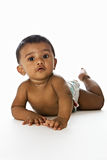

In [19]:
# Data Directories
# Training directories
train_dir = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders/Train/"
train_whiteclass_dir = os.path.join(train_dir, "White")
train_blackclass_dir = os.path.join(train_dir, "Black")
train_asianclass_dir = os.path.join(train_dir, "Asian")
train_indianclass_dir = os.path.join(train_dir, "Indian")


# Testing Directories
test_dir = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders/Test/"
test_whiteclass_dir = os.path.join(test_dir, "White")
test_blackclass_dir = os.path.join(test_dir, "Black")
test_asianclass_dir = os.path.join(test_dir, "Asian")
test_indianclass_dir = os.path.join(test_dir, "Indian")

# CVALLDIRECTORY
CVALL_Directory = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders/CVALL"


# Example Image
white_torch = torchvision.io.read_image("/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders/Train/Black/1_0_1_20161219160115237.jpg")

T.ToPILImage()(white_torch)

In [21]:
# Image Preprocessing
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),   #must same as here
    transforms.CenterCrop((224, 224)),
    transforms.RandomHorizontalFlip(), # data augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalization
])
transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),   #must same as here
     transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


train_dataset = datasets.ImageFolder(train_dir, transforms_train)
test_dataset = datasets.ImageFolder(test_dir, transforms_test)

all_dataset = datasets.ImageFolder(CVALL_Directory, transforms_train)

class_names = all_dataset.classes
print('Class names:', class_names)

Train dataset size: 12903
Test dataset size: 10061
Class names: ['Asian', 'Black', 'Indian', 'White']


In [111]:
# Define Model Initializer
from collections import Counter
from torchvision.models import resnet34, ResNet34_Weights

def model_criterion_optimizer_initialize():
    device = "cuda"
    model = models.resnet34(weights= ResNet34_Weights.IMAGENET1K_V1)

    # Grab all labels
    targets = [sample[1] for sample in all_dataset.samples]

    # Calculate class weights
    class_counts = Counter(targets)
    total_samples = len(targets)
    class_weights = {class_idx: total_samples / count for class_idx, count in class_counts.items()}
    weights = [class_weights[i] for i in range(len(class_counts))]

    # Take calculated weights into a tensor
    weights = torch.tensor(weights, dtype=torch.float32).to(device)


    # Define loss and optimizer, use calcluated weights above to penalize 
    criterion = nn.CrossEntropyLoss(weight = weights)
    optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

    # Set Random Seeds
    torch.manual_seed(42)
    torch.cuda.manual_seed(42)

    num_features = model.fc.in_features 
    print('Number of features from pre-trained model', num_features)

    # Add fully connected Linear layer that take the previous number of features and then outputs into 4 nodes (number of class labels)
    model.fc = nn.Linear(num_features, 4)
    model = model.to(device)

    return model, criterion, optimizer
    

In [112]:
# Define training function
def train(model, train_loader, criterion, optimizer, device):
    # Set to training mode
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        
        # move images to GPU 
        images, labels = images.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # forward propogate, compute predicted output based on images
        outputs = model(images)

        # calculate the loss
        loss = criterion(outputs, labels)

        # backwards propogate
        loss.backward()

        # update the model's parameters
        optimizer.step()

        # update running loss
        running_loss += loss.item()

        # calc num of correctly predicted samples
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    # Calculate average training loss and accuracy for epoch
    train_loss = running_loss / len(train_loader)
    train_acc = 100.0 * correct / total

    return train_loss, train_acc

In [114]:
# Validation function
def validate(model, val_loader, criterion, device):
    # Set model to eval mode / tracking variables
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    # disable gradient calc (since we are not training model we are validating / testing)
    with torch.no_grad():
        # iterate over the batches
        for images, labels in val_loader:

            # move images to GPU
            images, labels = images.to(device), labels.to(device)

            # forward propogate
            outputs = model(images)

            #calc loss
            loss = criterion(outputs, labels)

            # calculate running loss
            running_loss += loss.item()

            # calculate correct number of observations
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = running_loss / len(val_loader)
    val_acc = 100.0 * correct / total

    return val_loss, val_acc

In [115]:
# Train Model
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import Subset

# Initialize a SKFold object with five folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

num_epochs = 8

targets = [sample[1] for sample in all_dataset.samples]

# For each fold (enumerate number), 
# train_idx: provided by first object given by skf.split
# val_idx: provided by second object given by skf.split
#skf.split() iterates through the targets and returns 5 folds in which the indices correspond to "class balanced" train / validation sets

for fold, (train_idx, val_idx) in enumerate(skf.split(np.zeros(len(targets)), targets)):
    # Initialize Model Criterion Optimizer
    model, criterion, optimizer = model_criterion_optimizer_initialize()
    device = "cuda"

    # grab subset for training based on train indices returned by skf.split()
    train_subset = Subset(all_dataset, train_idx)

    # grab subset for validation based on train indices returned by skf.split()
    val_subset = Subset(all_dataset, val_idx)

    print(f"Train Subset Length: {len(train_subset)}")
    print(f"Val Subset Length: {len(val_subset)}")


    # Now properly Load Data into ingestible form for ResNet
    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=50, shuffle=True, num_workers=0)
    val_loader = torch.utils.data.DataLoader(val_subset, batch_size=50, shuffle=False, num_workers=0)


    for epoch in range(num_epochs):
        # Train model with current train fold
        train_loss, train_acc, = train(model, train_loader, criterion, optimizer, device)

        # Validate Model with current validation fold
        val_loss, val_acc = validate(model, val_loader, criterion, device)

        print(f"Fold: {fold + 1} Epoch: {epoch + 1}")
        print(f"train loss: {train_loss} train_acc: {train_acc}")
        print(f"val loss: {val_loss} val_acc: {val_acc}")

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\Andrew/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100.0%


Number of features from pre-trained model 512
Train Subset Length: 17914
Val Subset Length: 4479
Fold: 1 Epoch: 1
train loss: 1.3824098581723183 train_acc: 27.135201518365523
val loss: 1.2054917302396562 val_acc: 39.89729850413038
Fold: 1 Epoch: 2
train loss: 1.032601671962685 train_acc: 51.970525845707265
val loss: 0.9299381309085422 val_acc: 62.67023889260996
Fold: 1 Epoch: 3
train loss: 0.8225960685848194 train_acc: 66.68527408730601
val loss: 0.7814286003510157 val_acc: 71.44451886581827
Fold: 1 Epoch: 4
train loss: 0.707706610223377 train_acc: 72.80897621971643
val loss: 0.7043947938415739 val_acc: 74.68184862692566
Fold: 1 Epoch: 5
train loss: 0.6416957505400135 train_acc: 75.946187339511
val loss: 0.6560402009222243 val_acc: 77.33869167224827
Fold: 1 Epoch: 6
train loss: 0.5849439695186934 train_acc: 78.4749358043988
val loss: 0.5981750877367126 val_acc: 79.43737441393168
Fold: 1 Epoch: 7
train loss: 0.5419911666666897 train_acc: 80.22217260243384
val loss: 0.5814487493700451 va

KeyboardInterrupt: 